In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [2]:
#Importing the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
store_df = pd.read_csv('store.csv')
train_df.head()


<ipython-input-2-8cbd3138c746>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
#Dropping out Id coloumn to make it smoother
test_df.drop(['Id'],axis=1,inplace=True)
train_df.drop(["Customers"],axis=1,inplace=True)

In [4]:
# use the checking method as a function

In [5]:
# Checking for missing values in the training dataset
missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100
missing_data_info = pd.DataFrame({'Missing_Values': missing_values, 'Missing_Percentage': missing_percentage})
missing_data_info = missing_data_info.sort_values(by='Missing_Percentage', ascending=False)
print("Columns with the highest percentage of missing values:")
print(missing_data_info.head())

Columns with the highest percentage of missing values:
           Missing_Values  Missing_Percentage
Store                   0                 0.0
DayOfWeek               0                 0.0
Date                    0                 0.0
Sales                   0                 0.0
Open                    0                 0.0


In [6]:
# Check for missing values in the test dataset
missing_values = test_df.isnull().sum()
missing_percentage = (missing_values / len(test_df)) * 100
missing_data_info = pd.DataFrame({'Missing_Values': missing_values, 'Missing_Percentage': missing_percentage})
missing_data_info = missing_data_info.sort_values(by='Missing_Percentage', ascending=False)
print("Columns with the highest percentage of missing values:")
print(missing_data_info.head())

Columns with the highest percentage of missing values:
           Missing_Values  Missing_Percentage
Open                   11            0.026772
Store                   0            0.000000
DayOfWeek               0            0.000000
Date                    0            0.000000
Promo                   0            0.000000


In [7]:
#dropping NA since it's 0.026%
test_df.fillna(0, inplace=True)
missing_values = test_df.isnull().sum()
missing_percentage = (missing_values / len(test_df)) * 100
missing_data_info = pd.DataFrame({'Missing_Values': missing_values, 'Missing_Percentage': missing_percentage})
missing_data_info = missing_data_info.sort_values(by='Missing_Percentage', ascending=False)
print("Columns with the highest percentage of missing values:")
print(missing_data_info.head())

Columns with the highest percentage of missing values:
           Missing_Values  Missing_Percentage
Store                   0                 0.0
DayOfWeek               0                 0.0
Date                    0                 0.0
Open                    0                 0.0
Promo                   0                 0.0


In [8]:
train_store = pd.merge(train_df, store_df, on='Store')
test_store = pd.merge(test_df, store_df, on='Store')
train_store.head()

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
missing_values = train_store.isnull().sum()
missing_percentage = (missing_values / len(train_store)) * 100
missing_data_info = pd.DataFrame({'Missing_Values': missing_values, 'Missing_Percentage': missing_percentage})
missing_data_info = missing_data_info.sort_values(by='Missing_Percentage', ascending=False)
print("Columns with the highest percentage of missing values:")
print(missing_data_info.head())

Columns with the highest percentage of missing values:
                           Missing_Values  Missing_Percentage
PromoInterval                      508031           49.943620
Promo2SinceYear                    508031           49.943620
Promo2SinceWeek                    508031           49.943620
CompetitionOpenSinceYear           323348           31.787764
CompetitionOpenSinceMonth          323348           31.787764


In [10]:
missing_values = test_store.isnull().sum()
missing_percentage = (missing_values / len(test_store)) * 100
missing_data_info = pd.DataFrame({'Missing_Values': missing_values, 'Missing_Percentage': missing_percentage})
missing_data_info = missing_data_info.sort_values(by='Missing_Percentage', ascending=False)
print("Columns with the highest percentage of missing values:")
print(missing_data_info)

Columns with the highest percentage of missing values:
                           Missing_Values  Missing_Percentage
Promo2SinceWeek                     17232           41.939252
Promo2SinceYear                     17232           41.939252
PromoInterval                       17232           41.939252
CompetitionOpenSinceMonth           15216           37.032710
CompetitionOpenSinceYear            15216           37.032710
CompetitionDistance                    96            0.233645
Store                                   0            0.000000
DayOfWeek                               0            0.000000
Date                                    0            0.000000
Open                                    0            0.000000
Promo                                   0            0.000000
StateHoliday                            0            0.000000
SchoolHoliday                           0            0.000000
StoreType                               0            0.000000
Assortment     

In [11]:
train_store['CompetitionDistance'].fillna(train_store['CompetitionDistance'].median(), inplace=True)
test_store['CompetitionDistance'].fillna(test_store['CompetitionDistance'].median(), inplace=True)

train_store['PromoInterval'].fillna(0, inplace=True)
test_store['PromoInterval'].fillna(0, inplace=True)

train_store['CompetitionOpenSinceYear'].fillna(0, inplace=True)
train_store['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
test_store['CompetitionOpenSinceYear'].fillna(0, inplace=True)
test_store['CompetitionOpenSinceMonth'].fillna(0, inplace=True)

train_store['Promo2SinceYear'].fillna(0, inplace=True)
train_store['Promo2SinceWeek'].fillna(0, inplace=True)
test_store['Promo2SinceYear'].fillna(0, inplace=True)
test_store['Promo2SinceWeek'].fillna(0, inplace=True)

<ipython-input-11-abff22b82a0a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_store['CompetitionDistance'].fillna(train_store['CompetitionDistance'].median(), inplace=True)
<ipython-input-11-abff22b82a0a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [12]:
missing_values = test_store.isnull().sum()
missing_percentage = (missing_values / len(test_store)) * 100
missing_data_info = pd.DataFrame({'Missing_Values': missing_values, 'Missing_Percentage': missing_percentage})
missing_data_info = missing_data_info.sort_values(by='Missing_Percentage', ascending=False)
print("Columns with the highest percentage of missing values:")
print(missing_data_info)

Columns with the highest percentage of missing values:
                           Missing_Values  Missing_Percentage
Store                                   0                 0.0
DayOfWeek                               0                 0.0
Date                                    0                 0.0
Open                                    0                 0.0
Promo                                   0                 0.0
StateHoliday                            0                 0.0
SchoolHoliday                           0                 0.0
StoreType                               0                 0.0
Assortment                              0                 0.0
CompetitionDistance                     0                 0.0
CompetitionOpenSinceMonth               0                 0.0
CompetitionOpenSinceYear                0                 0.0
Promo2                                  0                 0.0
Promo2SinceWeek                         0                 0.0
Promo2SinceYear

In [13]:
train_store

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [14]:
print("Closed stores with sales are ",((train_store["Open"]==0) & (train_store["Sales"]>0)).sum())
print("Open stores with zero sales are",((train_store["Open"]==1) & (train_store["Sales"]<=0)).sum())
print("negative sales are ",(train_store["Sales"]<0).sum())

Closed stores with sales are  0
Open stores with zero sales are 54
negative sales are  0


In [15]:
train_store=train_store[~((train_store["Open"]==1) & (train_store["Sales"]<=0))]
print("Open stores with zero sales are",((train_store["Open"]==1) & (train_store["Sales"]<=0)).sum())

Open stores with zero sales are 0


In [16]:
from scipy.stats import zscore
numeric = train_store.select_dtypes(include=['number'])


z_scores = np.abs(zscore(numeric))
outliers = (z_scores > 3)
print(f"Number of rows before removing outliers: {train_store.shape[0]}")
train_store = train_store[~np.any(outliers, axis=1)]
print(f"Number of rows after removing outliers: {train_store.shape[0]}")

Number of rows before removing outliers: 1017155
Number of rows after removing outliers: 986781


In [17]:
train_store['Date'] = pd.to_datetime(train_df['Date'])
test_store['Date'] = pd.to_datetime(test_df['Date'])

train_store['Week'] = pd.to_datetime(train_store['Date']).dt.isocalendar().week
train_store['DayOfYear'] = pd.to_datetime(train_store['Date']).dt.dayofyear
train_store['DayOfMonth'] = pd.to_datetime(train_store['Date']).dt.day
train_store['Year'] = pd.DatetimeIndex(train_store['Date']).year
train_store['Quarter'] = pd.DatetimeIndex(train_store['Date']).quarter
train_store['Month'] = pd.DatetimeIndex(train_store['Date']).month
#train_store.sort_values(by=['Date'],ascending=True,inplace=True)


test_store['Week'] = pd.to_datetime(test_store['Date']).dt.isocalendar().week
test_store['DayOfYear'] = pd.to_datetime(test_store['Date']).dt.dayofyear
test_store['DayOfMonth'] = pd.to_datetime(test_store['Date']).dt.day
test_store['Year'] = pd.DatetimeIndex(test_store['Date']).year
test_store['Quarter'] = pd.DatetimeIndex(test_store['Date']).quarter
test_store['Month'] = pd.DatetimeIndex(test_store['Date']).month
#test_store.sort_values(by=['Date'],ascending=True,inplace=True)


train_store.drop(['Date'],axis=1,inplace=True)
test_store.drop(['Date'],axis=1,inplace=True)
train_store.head()
#test_store.head()

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Week,DayOfYear,DayOfMonth,Year,Quarter,Month
0,1,5,5263,1,1,0,1,c,a,1270.0,...,0,0.0,0.0,0,31,212,31,2015,3,7
1,2,5,6064,1,1,0,1,a,a,570.0,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,212,31,2015,3,7
2,3,5,8314,1,1,0,1,a,a,14130.0,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,212,31,2015,3,7
3,4,5,13995,1,1,0,1,c,c,620.0,...,0,0.0,0.0,0,31,212,31,2015,3,7
5,6,5,5651,1,1,0,1,a,a,310.0,...,0,0.0,0.0,0,31,212,31,2015,3,7


In [18]:
#Manually encoding the stateholiday coloumn before using pre made encoders:
train_store['StateHoliday'].replace("a", 1, inplace=True)
train_store['StateHoliday'].replace("b", 2, inplace=True)
train_store['StateHoliday'].replace("c", 3, inplace=True)
train_store['StateHoliday'].replace('0', 0, inplace=True)
train_store['StateHoliday'].unique()
test_store['StateHoliday'].replace("a", 1, inplace=True)
test_store['StateHoliday'].replace("b", 2, inplace=True)
test_store['StateHoliday'].replace("c", 3, inplace=True)
test_store['StateHoliday'].replace('0', 0, inplace=True)
test_store['StateHoliday'].unique()


<ipython-input-18-1c822b7229fe>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_store['StateHoliday'].replace("a", 1, inplace=True)
<ipython-input-18-1c822b7229fe>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

array([0, 1])

In [19]:
from sklearn.preprocessing import LabelEncoder
#try one hot encoder maybe better
category_train_store = train_store.select_dtypes(exclude=[np.number]).columns.tolist()
print("Categorical features in train dataset:", category_train_store)

Categorical_test_store = test_store.select_dtypes(exclude=[np.number]).columns.tolist()
print("Categorical features in test dataset:", Categorical_test_store)

le = LabelEncoder()
for column in category_train_store:
    train_store[column] = le.fit_transform(train_store[column].astype(str))

for column in Categorical_test_store:
    test_store[column] = le.fit_transform(test_store[column].astype(str))


Categorical features in train dataset: ['StoreType', 'Assortment', 'PromoInterval']
Categorical features in test dataset: ['StoreType', 'Assortment', 'PromoInterval']


In [20]:
print("Encoded features in train dataset:\n", train_store[category_train_store].head())
print("Encoded features in test dataset:\n", test_store[Categorical_test_store].head())

Encoded features in train dataset:
    StoreType  Assortment  PromoInterval
0          2           0              0
1          0           0              2
2          0           0              2
3          2           2              0
5          0           0              0
Encoded features in test dataset:
    StoreType  Assortment  PromoInterval
0          2           0              0
1          0           0              2
2          0           2              0
3          0           0              0
4          0           2              0


In [21]:
scaler = MinMaxScaler()
train_scaling=train_store.drop(["Sales"],axis=1,inplace=False)
scaled_x_train_store = pd.DataFrame(scaler.fit_transform(train_scaling),columns=train_scaling.columns)
scaled_test_store = scaler.fit_transform(test_store)
scaled_y_train_store = pd.DataFrame(scaler.fit_transform(pd.DataFrame(train_store["Sales"])),columns=["Sales"])
scaled_train_store=pd.concat([scaled_x_train_store, scaled_y_train_store], axis=1)
scaled_test_store = pd.DataFrame(scaled_test_store, columns=test_store.columns)

In [22]:
print(scaled_train_store.head())

      Store  DayOfWeek  Open  Promo  StateHoliday  SchoolHoliday  StoreType  \
0  0.000000   0.666667   1.0    1.0           0.0            1.0   0.666667   
1  0.000898   0.666667   1.0    1.0           0.0            1.0   0.000000   
2  0.001795   0.666667   1.0    1.0           0.0            1.0   0.000000   
3  0.002693   0.666667   1.0    1.0           0.0            1.0   0.666667   
4  0.004488   0.666667   1.0    1.0           0.0            1.0   0.000000   

   Assortment  CompetitionDistance  CompetitionOpenSinceMonth  ...  \
0         0.0             0.045241                   0.750000  ...   
1         0.0             0.019906                   0.916667  ...   
2         0.0             0.510677                   1.000000  ...   
3         1.0             0.021716                   0.750000  ...   
4         0.0             0.010496                   1.000000  ...   

   Promo2SinceWeek  Promo2SinceYear  PromoInterval      Week  DayOfYear  \
0             0.00         0.

In [23]:
print(scaled_test_store.head())
print(scaled_train_store.head())


      Store  DayOfWeek  Open  Promo  StateHoliday  SchoolHoliday  StoreType  \
0  0.000000        0.5   1.0    1.0           0.0            0.0   0.666667   
1  0.001795        0.5   1.0    1.0           0.0            0.0   0.000000   
2  0.005386        0.5   1.0    1.0           0.0            0.0   0.000000   
3  0.006284        0.5   1.0    1.0           0.0            0.0   0.000000   
4  0.007181        0.5   1.0    1.0           0.0            0.0   0.000000   

   Assortment  CompetitionDistance  CompetitionOpenSinceMonth  ...  Promo2  \
0         0.0             0.016482                   0.750000  ...     0.0   
1         0.0             0.186050                   1.000000  ...     1.0   
2         1.0             0.316192                   0.333333  ...     0.0   
3         0.0             0.098892                   0.833333  ...     0.0   
4         1.0             0.026503                   0.666667  ...     0.0   

   Promo2SinceWeek  Promo2SinceYear  PromoInterval  Week

In [24]:
#using the same error calc eqn provided by the compiti
def rmspe(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sqrt(np.mean(((y_true - y_pred) / y_true) ** 2))

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

In [26]:
x=scaled_train_store.drop(['Sales'],axis=1)
y=scaled_train_store['Sales']
print(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# print(X_train.head())
# print(X_test.head())
# print(y_train.head())
# print(y_test.head())

0         0.303816
1         0.350055
2         0.479940
3         0.807885
4         0.326214
            ...   
986776    0.000000
986777    0.000000
986778    0.000000
986779    0.000000
986780    0.000000
Name: Sales, Length: 986781, dtype: float64


In [34]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
model = models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),  #s
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)

])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1)
]
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()

# Train the model
batch_size = 32
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                    epochs=10, callbacks=callbacks, batch_size=batch_size)




Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 256)                 │           5,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,689 (198.00 KB)

 Trainable params: 49,793 (194.50 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/10
24670/24670 ━━━━━━━━━━━━━━━━━━━━ 75s 3ms/step - loss: 0.0573 - mae: 0.1440 - val_loss: 0.0148 - val_mae: 0.0862 - learning_rate: 0.0010
Epoch 2/10
24670/24670 ━━━━━━━━━━━━━━━━━━━━ 75s 3ms/step - loss: 0.0153 - mae: 0.0872 - val_loss: 0.0136 - val_mae: 0.0821 - learning_rate: 0.0010
Epoch 3/10
24670/24670 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - loss: 0.0146 - mae: 0.0849 - val_loss: 0.0128 - val_mae: 0.0778 - learning_rate: 0.0010
Epoch 4/10
24670/24670 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - loss: 0.0139 - mae: 0.0829 - val_loss: 0.0121 - val_mae: 0.0751 - learning_rate: 0.0010
Epoch 5/10
24670/24670 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - loss: 0.0135 - mae: 0.0815 - val_loss: 0.0117 - val_mae: 0.0744 - learning_rate: 0.0010
Epoch 6/10
24670/24670 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 0.0132 - mae: 0.0807 - val_loss: 0.0114 - val_mae: 0.0738 - learning_rate: 0.0010
Epoch 7/10
24670/24670 ━━━━━━━━━━━━━━━━━━━━ 67s 3ms/step - loss: 0.0130 - mae: 0.0800 - val_loss: 0.0108 - val_mae: 0.

KeyError: 'accuracy'

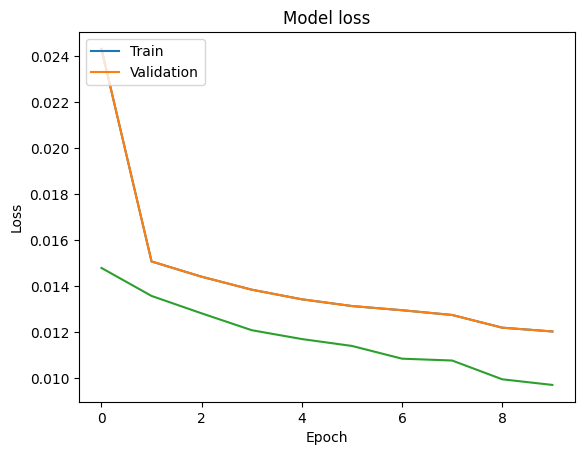

In [35]:
# Plot training history
plt.plot(history.history['loss'])


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [36]:
print(x_test.head())
print(scaled_test_store.head())

           Store  DayOfWeek  Open  Promo  StateHoliday  SchoolHoliday  \
132817  0.771095   0.166667   1.0    1.0           0.0            0.0   
347208  0.444345   0.833333   1.0    0.0           0.0            0.0   
904067  0.790844   0.000000   1.0    1.0           0.0            0.0   
880893  0.333034   0.000000   1.0    1.0           0.0            0.0   
778454  0.833034   0.666667   1.0    0.0           0.0            1.0   

        StoreType  Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
132817   0.666667         1.0             0.215708                   0.166667   
347208   1.000000         1.0             0.099891                   0.500000   
904067   0.000000         0.0             0.000362                   0.333333   
880893   1.000000         1.0             0.175896                   0.666667   
778454   0.000000         1.0             0.173724                   0.750000   

        ...  Promo2  Promo2SinceWeek  Promo2SinceYear  PromoInterval  \
13

In [37]:
# Evaluate the model
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f"Test Mean Absolute Error: {test_mae}")

# Predict sales for a new dataset
predicted_sales = model.predict(scaled_test_store)  # Ensure new_data is normalized the same way as x_train
predicted_sales=scaler.inverse_transform(predicted_sales)
print("Predicted Sales:", predicted_sales)


6168/6168 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0097 - mae: 0.0672
Test Mean Absolute Error: 0.0670933723449707
1284/1284 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Predicted Sales: [[12834.095 ]
 [12777.839 ]
 [14749.862 ]
 ...
 [ 6330.9844]
 [ 6721.462 ]
 [ 4116.178 ]]


In [38]:
print(type(predicted_sales))

<class 'numpy.ndarray'>


In [41]:
predicted_sales = predicted_sales.flatten()
df = pd.DataFrame({
    "ID": range(1, len(predicted_sales) + 1),
    "Sales": predicted_sales
})
print(df)

          ID         Sales
0          1  12834.094727
1          2  12777.838867
2          3  14749.862305
3          4  13287.390625
4          5  14697.198242
...      ...           ...
41083  41084   4251.461914
41084  41085   7460.009766
41085  41086   6330.984375
41086  41087   6721.461914
41087  41088   4116.178223

[41088 rows x 2 columns]


In [42]:
df.to_csv('submission.csv', index=False)